# Zadanie 1

Zaimplementować dwa przykłady rozwiązania problemu XOR.
Przeanalizować działanie poszczególnych neuronów wchodzących w skład pierwszej, jak i drugiej
warstwy. Zaprezentować graficznie ich działanie.

### Podejście 1

Wyjścia neuronów pierwszej warstwy:
[[0 0]
 [0 1]
 [1 0]
 [0 0]]

Wyjścia neuronów drugiej warstwy (wynik XOR):
[0 1 1 0]


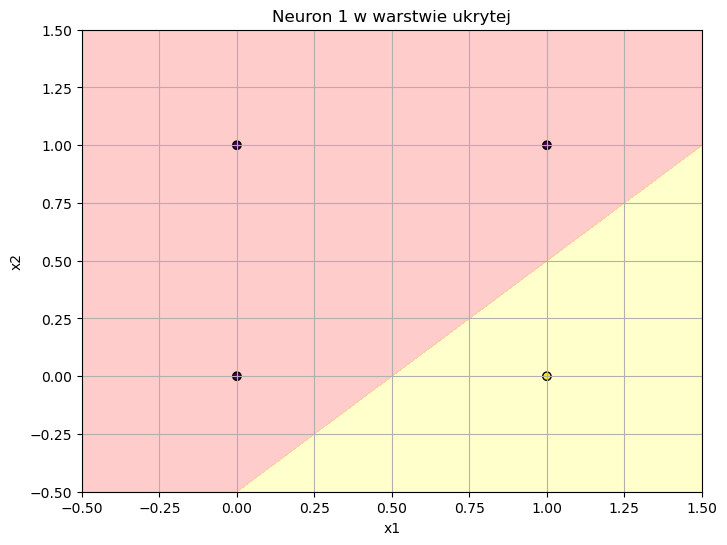

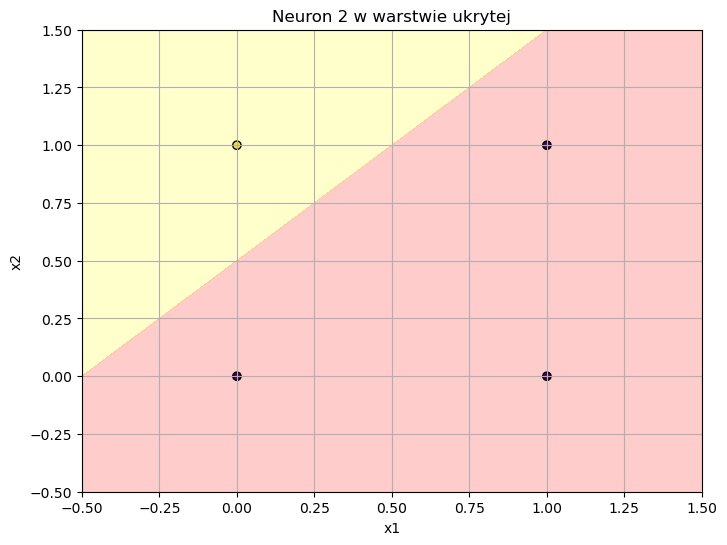

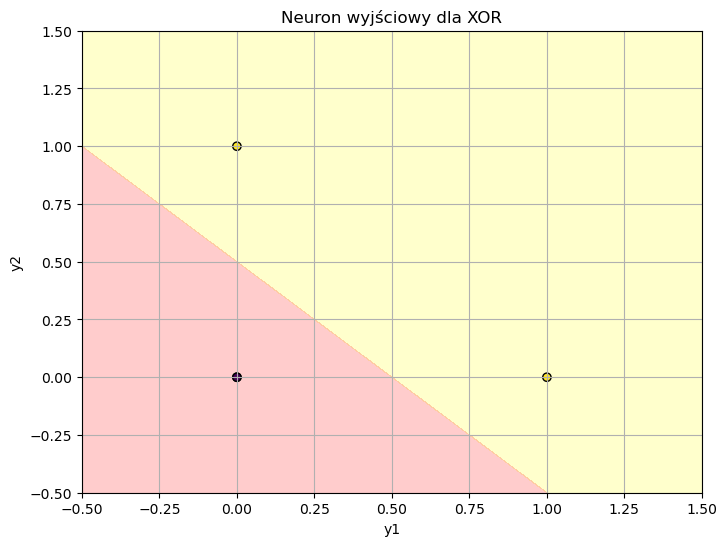

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def activation_function(x):
    return np.where(x >= 0, 1, 0)

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

weights_layer1 = np.array([[1, -1], [-1, 1]])
biases_layer1 = np.array([-0.5, -0.5])

weights_layer2 = np.array([1, 1])
bias_layer2 = -0.5

def xor_problem_1(X, weights1, biases1, weights2, bias2):
    net1 = np.dot(X, weights1.T) + biases1
    y1 = activation_function(net1)
    net2 = np.dot(y1, weights2.T) + bias2
    y2 = activation_function(net2)
    return y1, y2


y1, y2 = xor_problem_1(X, weights_layer1, biases_layer1, weights_layer2, bias_layer2)

print("Wyjścia neuronów pierwszej warstwy:")
print(y1)
print("\nWyjścia neuronów drugiej warstwy (wynik XOR):")
print(y2)

def plot_decision_boundary(X, y, title, x_label, y_label, weights, bias):
    plt.figure(figsize=(8, 6))
    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = np.linspace(-0.5, 1.5, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = -(weights[0] * X1 + weights[1] * X2 + bias)
    plt.contourf(X1, X2, Z, levels=[-np.inf, 0, np.inf], alpha=0.2, colors=['yellow', 'red'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.show()

plot_decision_boundary(X, y1[:, 0], "Neuron 1 w warstwie ukrytej", "x1", "x2", weights_layer1[0], biases_layer1[0])
plot_decision_boundary(X, y1[:, 1], "Neuron 2 w warstwie ukrytej", "x1", "x2", weights_layer1[1], biases_layer1[1])

plot_decision_boundary(y1, y2, "Neuron wyjściowy dla XOR", "y1", "y2", weights_layer2, bias_layer2)


### Podejście 2

Wyjście neuronu pierwszej warstwy:
[0 0 0 1]

Wyjście neuronu drugiej warstwy (wynik XOR):
[0 1 1 0]


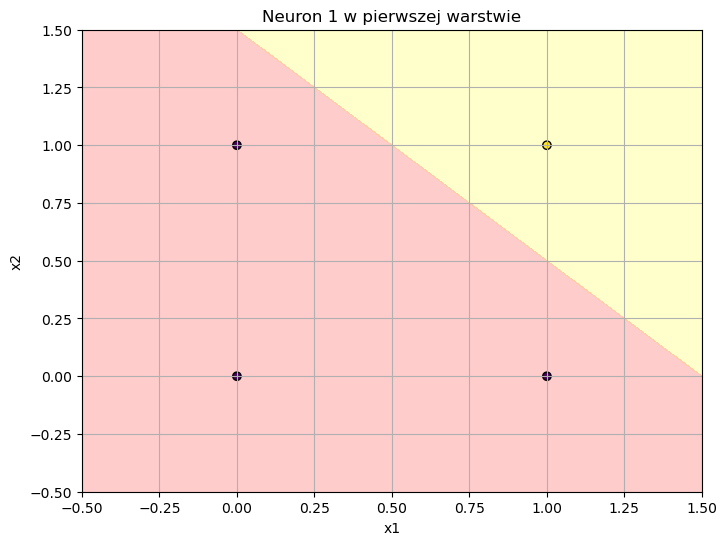

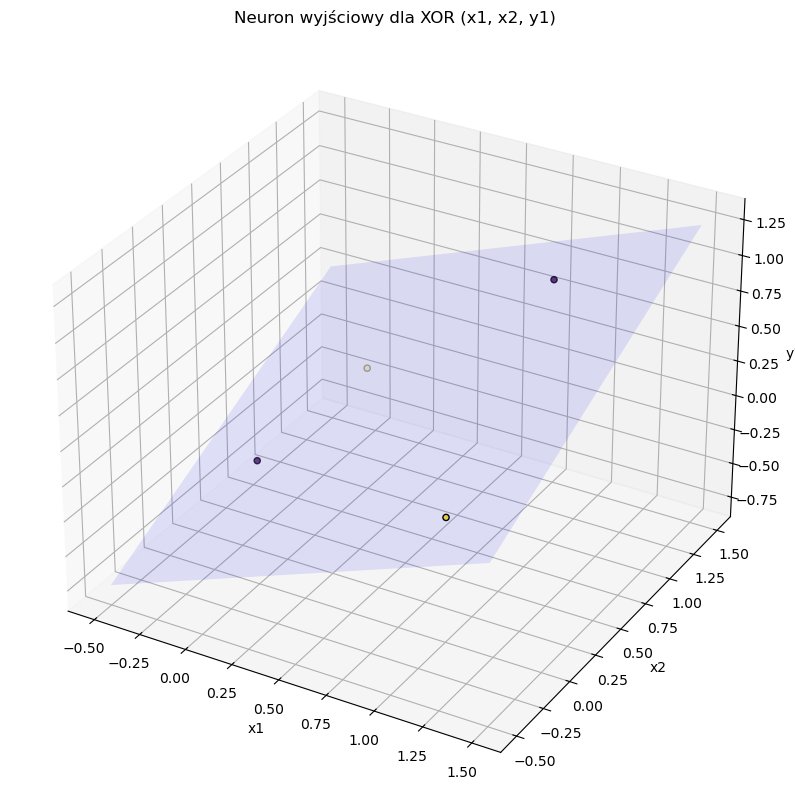

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def activation_function(x):
    return np.where(x >= 0, 1, 0)

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

weights_layer1 = np.array([1, 1])
bias_layer1 = -1.5

weights_layer2 = np.array([-2, 1, 1])
bias_layer2 = -0.5

def xor_problem_2(X, weights1, bias1, weights2, bias2):
    net1 = np.dot(X, weights1) + bias1
    y1 = activation_function(net1)
    net2 = weights2[0] * y1 + weights2[1] * X[:, 0] + weights2[2] * X[:, 1] + bias2
    y2 = activation_function(net2)
    return y1, y2

y1, y2 = xor_problem_2(X, weights_layer1, bias_layer1, weights_layer2, bias_layer2)

print("Wyjście neuronu pierwszej warstwy:")
print(y1)
print("\nWyjście neuronu drugiej warstwy (wynik XOR):")
print(y2)

def plot_decision_boundary(X, y, title, x_label, y_label, weights, bias):
    plt.figure(figsize=(8, 6))
    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = np.linspace(-0.5, 1.5, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = -(weights[0] * X1 + weights[1] * X2 + bias)
    plt.contourf(X1, X2, Z, levels=[-np.inf, 0, np.inf], alpha=0.2, colors=['yellow', 'red'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.show()

plot_decision_boundary(X, y1, "Neuron 1 w pierwszej warstwie", "x1", "x2", weights_layer1, bias_layer1)

def plot_3d_output(X, y1, y2, weights, bias, title):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X[:, 0], X[:, 1], y1, c=y2, cmap='viridis', edgecolors='k')

    x1_vals = np.linspace(-0.5, 1.5, 100)
    x2_vals = np.linspace(-0.5, 1.5, 100)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    
    Y1 = -(weights[1] * X1 + weights[2] * X2 + bias) / weights[0]
    
    ax.plot_surface(X1, X2, Y1, alpha=0.1, color='blue', label="Płaszczyzna decyzyjna")

    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y1")
    plt.show()

plot_3d_output(X, y1, y2, weights_layer2, bias_layer2, "Neuron wyjściowy dla XOR (x1, x2, y1)")

# Zadanie 2

Zaproponować rozwiązanie problemu parzystości dla N=4 (wymiar danych wejściowych).
Zaimplementować. Przeanalizować działanie poszczególnych neuronów w zaproponowanej sieci.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def activation_function(x):
    return np.where(x >= 0, 1, 0)

X = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 1, 1, 0],
    [1, 1, 1, 1]
])

y = np.array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

weights_layer1 = np.array([[1, -1], [-1, 1]])
biases_layer1 = np.array([-0.5, -0.5])

weights_layer2 = np.array([1, 1])
bias_layer2 = -0.5

def xor_problem_1(X, weights1, biases1, weights2, bias2):
    net1 = np.dot(X, weights1.T) + biases1
    y1 = activation_function(net1)
    net2 = np.dot(y1, weights2.T) + bias2
    y2 = activation_function(net2)
    return y1, y2

# Podproblem 1: XOR dla x1 i x2
y1_hidden, y1_output = xor_problem_1(X[:, :2], weights_layer1, biases_layer1, weights_layer2, bias_layer2)

# Podproblem 2: XOR dla x3 i x4
y2_hidden, y2_output = xor_problem_1(X[:, 2:], weights_layer1, biases_layer1, weights_layer2, bias_layer2)

weight_layer3 = -1
bias_layer3 = 0

def xnor_problem(X, weights1, biases1, weights2, bias2, weight3, bias3):
    net1 = np.dot(X, weights1.T) + biases1
    y1 = activation_function(net1)
    net2 = np.dot(y1, weights2.T) + bias2
    y2 = activation_function(net2)
    net3 = np.dot(y2, weight3) + bias3
    y3 = activation_function(net3)
    return y1, y2, y3

# Końcowy XNOR: XNOR dla wyników podproblemów 1 i 2
y_final_hidden1, y_final_hidden2, y_final_output = xnor_problem(
    np.column_stack((y1_output, y2_output)),
    weights_layer1,
    biases_layer1,
    weights_layer2,
    bias_layer2,
    weight_layer3,
    bias_layer3
)

print("Wyniki dla podproblemu 1 (XOR x1, x2):")
print(y1_output)

print("\nWyniki dla podproblemu 2 (XOR x3, x4):")
print(y2_output)

print("\nWyniki końcowe (XNOR wyników z podproblemu 1 i 2):")
print(y_final_output)

accuracy = np.mean(y_final_output == y) * 100
print(f"\nDokładność klasyfikacji: {accuracy:.2f}%")


Wyniki dla podproblemu 1 (XOR x1, x2):
[0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]

Wyniki dla podproblemu 2 (XOR x3, x4):
[0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0]

Wyniki końcowe (XNOR wyników z podproblemu 1 i 2):
[1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1]

Dokładność klasyfikacji: 100.00%


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def activation_function(x):
    return np.where(x >= 0, 1, 0)

X = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 1, 1, 0],
    [1, 1, 1, 1]
])

y = np.array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

weights_layer1 = np.array([[1, -1, 0, 0], [-1, 1, 0, 0], [0, 0, 1, -1], [0, 0, -1, 1]])
biases_layer1 = np.array([-0.5, -0.5, -0.5, -0.5])

weights_layer2 = np.array([[1, 1, 0, 0], [0, 0, 1, 1]])
biases_layer2 = np.array([-0.5, -0.5])

weights_layer3 = np.array([[1, -1], [-1, 1]])
biases_layer3 = np.array([-0.5, -0.5])

weights_layer4 = np.array([1, 1])
bias_layer4 = -0.5

weight_layer5 = -1
bias_layer5 = 0

def parity_problem(X, weights1, biases1, weights2, biases2, weights3, biases3, weights4, bias4, weight5, bias5):
    net1 = np.dot(X, weights1.T) + biases1
    y1 = activation_function(net1)
    net2 = np.dot(y1, weights2.T) + biases2
    y2 = activation_function(net2)
    net3 = np.dot(y2, weights3.T) + biases3
    y3 = activation_function(net3)
    net4 = np.dot(y3, weights4.T) + bias4
    y4 = activation_function(net4)
    net5 = np.dot(y4, weight5) + bias5
    y5 = activation_function(net5)
    return y1, y2, y3, y4, y5

y1, y2, y3, y4, y5 = parity_problem(
    X,
    weights_layer1,
    biases_layer1,
    weights_layer2,
    biases_layer2,
    weights_layer3,
    biases_layer3,
    weights_layer4,
    bias_layer4,
    weight_layer5,
    bias_layer5
)

print("\nWyniki końcowe:")
print(y5)

accuracy = np.mean(y5 == y) * 100
print(f"\nDokładność klasyfikacji: {accuracy:.2f}%")



Wyniki końcowe:
[1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1]

Dokładność klasyfikacji: 100.00%
